# **Numeric/Numeric Bivariate Analysis**


Learning Outcomes:

LO 1: Students will be able to select, run, and interpret univariate and bivariate statistical analyses and visualizations.


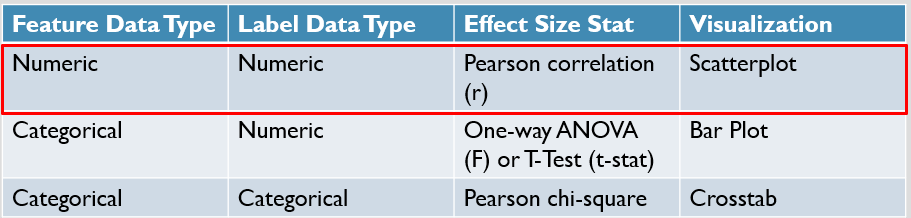

In [2]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/s/vdnsxihhn7pgdtq/mpg.csv?dl=1')

df.head()

,MPG,Cylinders,Displacement,Horse_Power,Weight,Acceleration,Model_Year,Name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


# **Correlation Definition**

**Pearson Correlation ( R Value)**: Measure of the strength of the linear relationship between two variables.

Ranges from -1 to 1

A **negative correlation** (or negative R Value) means there is a negative correlation between two variables. As one variable increase, the other decreases. For example, as the height of a mountain increases, the temperature decreases.

A **positive correlation** (or positive R Value) means there is a positive correlation between two variables. As one variable increases, the other also increase. For example, as a infant's height increases, so does their weight.

The closer the R Value is to -1 or 1, the stronger the correlation. The closer the R Value is to 0, the weaker the correlation.

There isn't a hard fast rule on what is considered a 'good' correlation. A good rule of thumb is the following:

small absolute value effect size: 0 < r < .29

medium absolute value effect size: .30 < r < .49

large absolute value effect size: .50 < r < 1.00


# **P-Value Definition**

**Null hypothesis:** there is no relationship between the variables being studied (one does not affect the other). For example, the weight of the car does not affect the Miles Per Gallon (MPG). Any correlation we see between the two is just a coincidence

**Alternative hypotheses:** There IS a relationship between the variables being studied. For example, the weight of the car does affect the MPG.

A p-value is a number describing how likely it is that your data would have occured by random chance (i.e. that the null hypothesis is true and the weight of the car doesn't have an affect on the MPG.

The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

https://www.simplypsychology.org/p-value.html

# **Correlation - Two variables**

Calculate the R value, P-value, and scatter plot for Acceleration and MPG. What do we learn from these results?

In [2]:
from scipy import stats

r, p = stats.pearsonr(df.Acceleration, df.MPG)
print('r: ' + str(round(r, 4)))
print('p-value:' + str(round(p, 4)))

r: 0.4233
p-value:0.0


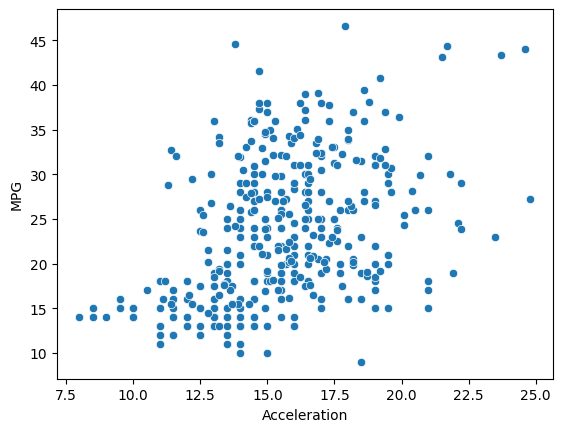

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = df.Acceleration, y = df.MPG)
plt.show()

# **Correlation - All individual features to a Label**

What feature has the greatest correlation with MPG? Show the R Values for each feature with MPG. Which feature has the smallest correlation?

In [14]:
df.select_dtypes(include="number").corr()['MPG'].abs().sort_values()

Acceleration    0.423329
Model_Year      0.580541
Cylinders       0.777618
Horse_Power     0.778427
Displacement    0.805127
Weight          0.832244
MPG             1.000000
Name: MPG, dtype: float64

Here is a way to also show the p-values with the correlation values for all features with MPG.

In [5]:
corr_df = pd.DataFrame(columns = ['r', 'p-value'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df[col], df.MPG)
    corr_df.loc[col] = [round(r, 3), round(p,6)]

corr_df.sort_values(by=['r'], ascending=False)

,r,p-value
MPG,1.000,0.0
Model_Year,0.581,0.0
Acceleration,0.423,0.0
Cylinders,-0.778,0.0
Horse_Power,-0.778,0.0
Displacement,-0.805,0.0
Weight,-0.832,0.0


In [16]:
corr_df = pd.DataFrame(columns = ['r', 'p-value'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    r, p = stats.pearsonr(df[col], df.Weight)
    corr_df.loc[col] = [round(r, 3), round(p,6)]

corr_df.sort_values(by=['r'], ascending=False)

,r,p-value
Weight,1.000,0.0
Displacement,0.933,0.0
Cylinders,0.898,0.0
Horse_Power,0.865,0.0
Model_Year,-0.309,0.0
Acceleration,-0.417,0.0
MPG,-0.832,0.0


# **Correlation Matrix**

Calculate a Correlation Matrix combined with a heat map. This will show all possible R values.

<Axes: >

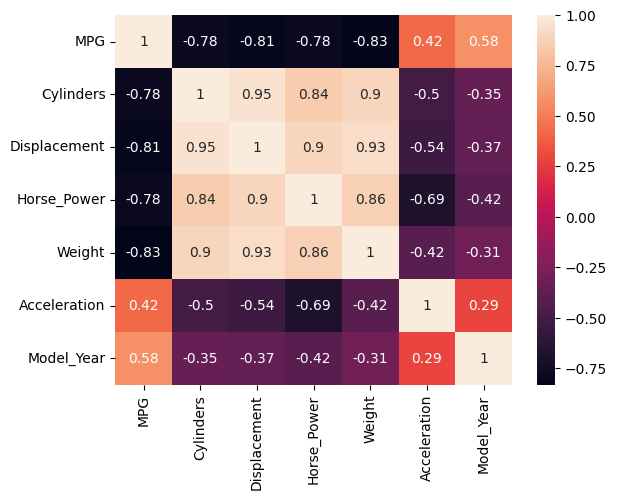

In [15]:
import seaborn as sns

correlation_mat = df.select_dtypes(include="number").corr()

sns.heatmap(correlation_mat, annot = True)

# **Linear Regression Equation**

The linear regression equation represents the best-fitting straight line that describes the relationship between two variables.

y = mx + b

m = slope (the rate of change of y with respect to x)

b = y-intercept (the value of y when x is 0)

If you know what x is, you can predict what y will be (assumming some assumptions are met).

Print out the linear regression equation with displacement as the feature and MPG as the label.

In [17]:
#Generate the slope and y-intercept --> np.polyfit(x variable, y variable, 1). The 1 makes it a linear regression, instead of polynomial regression.
#output is an array. The first value is the slope (or coefficient). The second value is the y-intercept
import numpy as np
m, b = np.polyfit(df.Displacement, df.MPG, 1)


In [18]:
print('y = ' + str(round(m, 3)) + 'x +' + str(round(b, 3)))

y = -0.06x +35.121


Plot the linear regression equation on the scatter plot (i.e., use the lmplot -- linear model plot)

In [1]:
sns.lmplot(x ='Displacement', y ='MPG', data = df)
plt.show()

NameError: name 'sns' is not defined

# **R Square Value**

R Square: indicates the percentage of the variance in the dependent variable that the independent variable(s) explain.

A higher R Square represents smaller differences between the observed data and the fitted (predicted) values. Typically a higher R Square is better.

https://statisticsbyjim.com/regression/interpret-r-squared-regression/

Calculate the R Square between the Displacement and MPG

In [21]:
r, p = stats.pearsonr(df.Displacement, df.MPG)

r2 = r ** 2
r2

0.6482294003193044

# **Practice Problems**

1. Show the R Value, P-Value, R Square Value and the Linear Regression Equation for **Weight** and MPG (MPG being the label). Plot the data. What do you learn from this information?

r: -0.8322
p-value:0.0
y = -0.008x +46.217


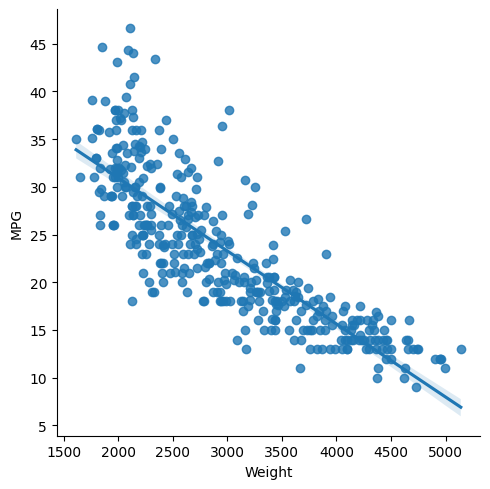

In [31]:
from scipy import stats

r, p = stats.pearsonr(df.Weight, df.MPG)
print('r: ' + str(round(r, 4)))
print('p-value:' + str(round(p, 4)))


import numpy as np
m, b = np.polyfit(df.Weight, df.MPG, 1)

print('y = ' + str(round(m, 3)) + 'x +' + str(round(b, 3)))

sns.lmplot(x ='Weight', y ='MPG', data = df)
plt.show()



2. Show the R Value, P-Value, R Square Value and the Linear Regression Equation for **Horse Power** and MPG (MPG being the label). Plot the data. What do you learn from this information?

r: -0.7784
p-value:0.0
y = -0.158x +39.936


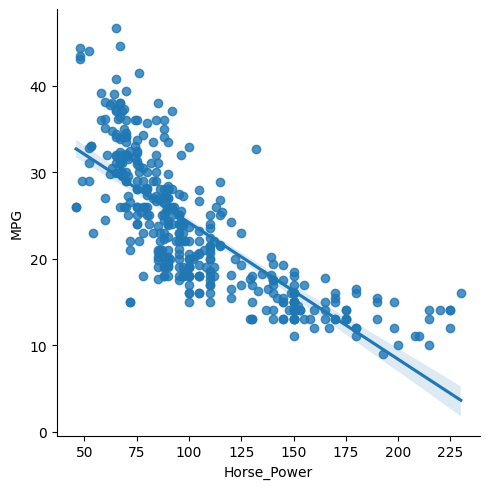

In [37]:
from scipy import stats

r, p = stats.pearsonr(df.Horse_Power, df.MPG)
print('r: ' + str(round(r, 4)))
print('p-value:' + str(round(p, 4)))


import numpy as np
m, b = np.polyfit(df.Horse_Power, df.MPG, 1)

print('y = ' + str(round(m, 3)) + 'x +' + str(round(b, 3)))

sns.lmplot(x ='Horse_Power', y ='MPG', data = df)
plt.show()


# **Extra Practice #2 - Housing Data**

Use the following Housing Data.

Identify what feature has the greatest correlation to the Sale Price. Create a scatter plot with a linear regression line for those two variables. Calculate the r value, p-value, r square and linear regression equation.

What do you learn about the correlation between these two variables?

Let's assume that all linear regression assumptions are met. What is the predicted sale price of a 2000 square foot home? What percent of variance in sale price can be explained by the home's total square feet?

In [ ]:
df2 = pd.read_csv('http://www.ishelp.info/data/housing.csv')

df2.head()

In [36]:
# Heteroskedasticity


from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Fit the OLS model
model = ols(formula='Displacement~MPG', data=df).fit()
white_test = het_white(model.resid, model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(3)



,LM stat,LM p-value,F-stat,F p-value
White,20.021,0.000,10.469,0.000
Breusch-Pagan,1.848,0.174,1.847,0.175
